<a href="https://colab.research.google.com/github/maddisurekha1234/surekha_INFO5731_-Fall2021/blob/main/In_class_exercise/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [41]:
# Write your code here
import nltk
nltk.download()



NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [42]:
#Reading and formating training data set
import pandas as pd
train_data = open('stsa-train.txt').read()
train_label, train_text = [], []
for i, j in enumerate(train_data.split("\n")):
    c = j.split(' ')
    train_label.append(c[0])
    train_text.append(" ".join(c[1:]))

In [43]:
#Reading and formating test data set
test_data = open('stsa-test.txt').read()
test_label, test_text = [], []
for i, j in enumerate(test_data.split("\n")):
    c = j.split(' ')
    test_label.append(c[0])
    test_text.append(" ".join(c[1:]))

In [44]:
# creating data frame
df = pd.DataFrame (list(zip(train_text, train_label)) , columns = ['Raw Text', 'Labels'])
test_df = pd.DataFrame (list(zip(test_text, test_label)) , columns = ['Raw Text', 'Labels'])
test_df = test_df.dropna()

In [45]:
#cleaning train data set
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')
#Lower case
df['After Lowercasing'] = df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removing Punctuation
df['After Removing Punctuation'] = df['After Lowercasing'].str.replace('[^\w\s]','')
#Removing special charachters
df['After Removing special charachters'] = df['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#Removing stopwords
df['After Removing Stopwords'] = df['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Tokenization
df['Tokenization'] = df['After Removing Stopwords'].apply(lambda x: TextBlob(x).words)
#Lemmatization
df['After Lemmatization'] = df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
#cleaning test data set

#Lower case
test_df['After Lowercasing'] = test_df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removing punctuation
test_df['After Removing Punctuation'] = test_df['After Lowercasing'].str.replace('[^\w\s]','')
#Removing special characters
test_df['After Removing Special Characters'] = test_df['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#Removing stopwords
test_df['After Removing Stopwords'] = test_df['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Tokenization
test_df['Tokenization'] = test_df['After Removing Stopwords'].apply(lambda x: TextBlob(x).words)
#Lemmatization
test_df['After Lemmatization'] = test_df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
#Data Transformation of train data set
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
# from sklearn.feature_extraction.text import TfidfVectorizer
train_idf_vect = TfidfVectorizer(analyzer='word')
train_idf_vect.fit(df['After Lemmatization'])
x_tfidf =  train_idf_vect.transform(df['After Lemmatization'])

In [49]:
#Data Tranformation of test data set
vect_test = TfidfVectorizer(analyzer='word', vocabulary = train_idf_vect.vocabulary_)
vect_test.fit(test_df['After Lemmatization'])
xtest = vect_test.transform(test_df['After Lemmatization'])
test_y = test_df['Labels']

In [50]:
#splitting of data into training and testing

from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, df['Labels'].values,test_size=0.2)

from sklearn import metrics
def get_metrics(predictions, test_data_y):
  acc = metrics.accuracy_score(predictions, test_data_y)
  prec = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return acc, prec, recall, f1

import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

In [51]:
#Navie Bayes - Validation Metrics

nbm = naive_bayes.MultinomialNB()
nbm.fit(train_x, train_y)
nbpvdata = nbm.predict(valid_x)
acc, prec, recall, f1 = get_metrics(nbpvdata, valid_y)
print("Accuracy is ", acc,"\nPrecision is",prec,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores of Navie Bayes
nb_scores_mean = cross_validation_score(nbm, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is ',nb_scores_mean)

#Testing Metrics
nbpt_data = nbm.predict(xtest)
acc, prec, recall, f1 = get_metrics(nbpt_data, test_y)
print("Accuracy is ", acc,"\nPrecision is",prec,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores of MultinominalNB_Testing
testing_mean = cross_validation_score(nbm, xtest, test_y)
print('Navie Bayes Cross Validation Score is ', testing_mean)



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.7855595667870036 
Precision is 0.7855595667870036 
Recall is: 0.7855595667870036 
F1 is: 0.7855595667870036
Navie Bayes Cross Validation Score is  0.695975393598165
Accuracy is  0.7892425905598244 
Precision is 0.7892425905598244 
Recall is: 0.7892425905598244 
F1 is: 0.7892425905598244
Navie Bayes Cross Validation Score is  0.7371044256290158


In [52]:
#SVM - Validation Metrics
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)
svm_predictions_validation_data = svm_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores- svm
svm_mean = cross_validation_score(svm_model, valid_x, valid_y)
print('SVM Cross Validation Score is', svm_mean)

#Testing Metrics
svm_predictions_test_data = svm_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores- svm-testing
svm_test_scores_mean = cross_validation_score(svm_model, xtest, test_y)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.7826714801444044 
Precision is 0.7826714801444044 
Recall is: 0.7826714801444044 
F1 is: 0.7826714801444044
SVM Cross Validation Score is 0.685830466061933


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.7826564215148188 
Precision is 0.7826564215148188 
Recall is: 0.7826564215148188 
F1 is: 0.782656421514819
SVM Cross Validation Score is 0.7239086050561461


In [53]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(train_x, train_y)
knn_predictions_valid_data = knn_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score
knn_scores_mean = cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is', knn_scores_mean)

#Testing Metrics
knn_predictions_test_data = knn_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores-Testing 
knn_test_scores_mean = cross_validation_score(knn_model, xtest, test_y)
print('KNN Cross Validation Score is', knn_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.7299638989169676 
Precision is 0.7299638989169676 
Recall is: 0.7299638989169676 
F1 is: 0.7299638989169676
KNN Cross Validation Score is 0.6815764779480763


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.7387486278814489 
Precision is 0.7387486278814489 
Recall is: 0.7387486278814489 
F1 is: 0.7387486278814488
KNN Cross Validation Score is 0.6361376328589443


In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(train_x, train_y)
dt_predictions_valid_data = decision_tree_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores
decision_tree_scores_mean = cross_validation_score(decision_tree_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is',decision_tree_scores_mean)

#Testing Metrics
decision_tree_predictions_test_data = decision_tree_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(decision_tree_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score testing
decision_tree_test_scores_mean = cross_validation_score(decision_tree_model, xtest, test_y)
print('Decision Tree Cross Validation Score is', decision_tree_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.6620938628158844 
Precision is 0.6620938628158844 
Recall is: 0.6620938628158844 
F1 is: 0.6620938628158844
Decision Tree Cross Validation Score is 0.6043634657491399
Accuracy is  0.6761800219538968 
Precision is 0.6761800219538968 
Recall is: 0.6761800219538968 
F1 is: 0.6761800219538968


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Decision Tree Cross Validation Score is 0.6289437338617667


In [55]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(train_x, train_y)
random_forest_predictions_valid_data = random_forest_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(random_forest_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score
random_forest_scores_mean = cross_validation_score(random_forest_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(random_forest_scores_mean))

#Testing Metrics
random_forest_predictions_test_data = random_forest_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(random_forest_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score testing
random_forest_test_scores_mean = cross_validation_score(random_forest_model, xtest, test_y)
print('Random Forest Cross Validation Score is', random_forest_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.752346570397112 
Precision is 0.752346570397112 
Recall is: 0.752346570397112 
F1 is: 0.752346570397112
Random Forest Cross Validation Score is 0.6678344281096862


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.743139407244786 
Precision is 0.743139407244786 
Recall is: 0.743139407244786 
F1 is: 0.743139407244786
Random Forest Cross Validation Score is 0.6712334113973457


In [56]:
#XGBoost
from xgboost import XGBClassifier
xg_boost_model = XGBClassifier()
xg_boost_model.fit(train_x, train_y)
xg_boost_predictions_valid_data = xg_boost_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(xg_boost_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score
xg_boost_scores_mean = cross_validation_score(XGBClassifier(), valid_x, valid_y)
print('XG Boost Cross Validation Score is ', xg_boost_scores_mean)

#Testing
xg_boost_predictions_test_data = xg_boost_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(xg_boost_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score testing
xg_boost_test_scores_mean = cross_validation_score(XGBClassifier(), xtest, test_y)
print('XG Boost Cross Validation Score is',xg_boost_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is  0.6368231046931407 
Precision is 0.6368231046931407 
Recall is: 0.6368231046931407 
F1 is: 0.6368231046931407
XG Boost Cross Validation Score is  0.6345480137629027
Accuracy is  0.6432491767288694 
Precision is 0.6432491767288694 
Recall is: 0.6432491767288694 
F1 is: 0.6432491767288694
XG Boost Cross Validation Score is 0.6251035849396506


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [57]:
#Write your code here.
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

(5000, 6)
(3422, 6)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


positive    2522
negative     900
Name: Rating, dtype: int64

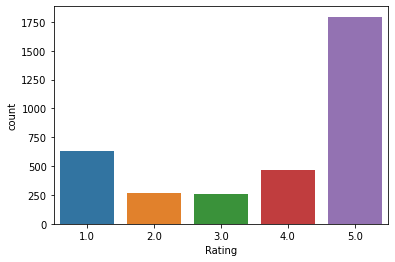

In [58]:
#You can write you answer here. (No code needed)

import pandas as pd
amazon_review = pd.read_csv("Amazon_Unlocked_Mobile.csv")
amazon_review = amazon_review.head(5000)
print(amazon_review.shape)
AfterRemoving_NullValues = amazon_review.dropna()
print(AfterRemoving_NullValues.shape)
import seaborn as sns
sns.countplot(AfterRemoving_NullValues.Rating)
#classifying
def Classification_review(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

Classification_rating = AfterRemoving_NullValues['Rating'].map(Classification_review) 
AfterRemoving_NullValues['Rating'] = Classification_rating
AfterRemoving_NullValues['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


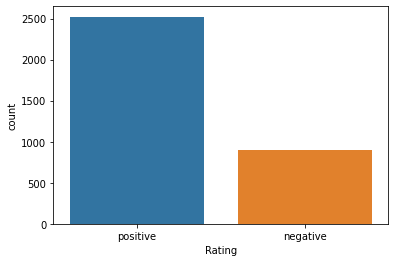

In [59]:
import seaborn as sns
sns.countplot(AfterRemoving_NullValues.Rating)

In [60]:
#pre processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re
c=0;
for i in AfterRemoving_NullValues['Reviews'].values:
    if (len(re.findall('<.*?>', i))):
        print(c)
        print(i)
        break;
    c += 1;

def html(sentence):
    cleaned= re.compile('<.*?>')
    cleaned_text = re.sub(cleaned, ' ', sentence)
    return cleaned_text
#lower case
AfterRemoving_NullValues['After Lowercasing'] = AfterRemoving_NullValues['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#clean html
AfterRemoving_NullValues['After Cleaning HTML'] = AfterRemoving_NullValues['After Lowercasing'].apply(lambda x: html(x))
#Removing special charachters
AfterRemoving_NullValues['Cleaned Text'] = AfterRemoving_NullValues['After Cleaning HTML'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#stop words removal
AfterRemoving_NullValues['Cleaned Text'] = AfterRemoving_NullValues['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [61]:
# k means
from sklearn.feature_extraction.text import CountVectorizer
vector_count = CountVectorizer()
counted = vector_count.fit_transform(AfterRemoving_NullValues['Cleaned Text'].values)
column_names = vector_count.get_feature_names()
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(counted)

label = model.labels_
cc = model.cluster_centers_
print(cc)

from sklearn import metrics
ss = metrics.silhouette_score(counted, label, metric='euclidean')
print(ss)

data_frame = AfterRemoving_NullValues
data_frame['Bow Clus Label'] = model.labels_
data_frame.groupby(['Bow Clus Label'])['Reviews'].count()

[[2.05479452e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.84931507e-03]
 [2.63059000e-03 0.00000000e+00 7.51597144e-04 ... 1.50319429e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0.35392908766809134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bow Clus Label
0     146
1    2661
2       1
3      36
4      21
5     548
6       2
7       3
8       2
9       2
Name: Reviews, dtype: int64

cluster ranking per each term
Cluster 0: phone
 good
 screen
 use
 great
 one
 like
 battery
 really
 sim
Cluster 1: phone
 great
 good
 screen
 works
 price
 work
 like
 one
 love
Cluster 2: idol
 sound
 light
 like
 screen
 bass
 even
 5s
 version
 day
Cluster 3: phone
 screen
 good
 camera
 like
 battery
 one
 use
 idol
 great
Cluster 4: phone
 screen
 one
 like
 good
 camera
 would
 use
 phones
 get
Cluster 5: phone
 screen
 great
 good
 one
 would
 like
 price
 get
 battery
Cluster 6: phone
 camera
 tracfone
 idol
 data
 one
 use
 screen
 like
 time
Cluster 7: carrier
 iphone
 phone
 purchase
 compatible
 card
 unlocked
 sim
 provider
 purchased
Cluster 8: phone
 like
 good
 quality
 one
 camera
 really
 moto
 phones
 screen
Cluster 9: phone
 camera
 like
 great
 screen
 really
 price
 app
 use
 better


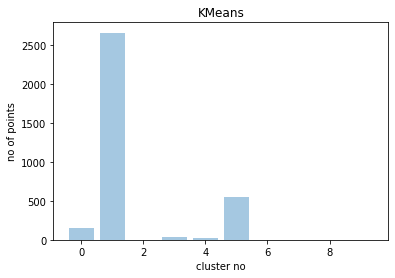

In [62]:
print("cluster ranking per each term")
order = model.cluster_centers_.argsort()[:, ::-1]
terms_count = vector_count.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order[i, :10]:
        print(' %s' % terms_count[ind], end='')
        print()

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], data_frame.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans')
plt.xlabel("cluster no")
plt.ylabel("no of points")
plt.show()

In [63]:
l = []
for i in AfterRemoving_NullValues['Cleaned Text'].values:
    l.append(i.split())

import gensim
w_v_model=gensim.models.Word2Vec(l,size=100, workers=4)


import numpy as np
vector_sentence = []
for i in l:
  sentence_vector = np.zeros(100)
  count = 0
  for word in i:
    try:
      vec = w_v_model.wv[word]
      sentence_vector += vec
      count += 1
    except:
      pass
  sentence_vector /= count
  vector_sentence.append(sentence_vector)
vector_sentence = np.array(vector_sentence)
vector_sentence = np.nan_to_num(vector_sentence)
vector_sentence.shape

num_clus = [x for x in range(3,11)]
num_clus


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


[3, 4, 5, 6, 7, 8, 9, 10]

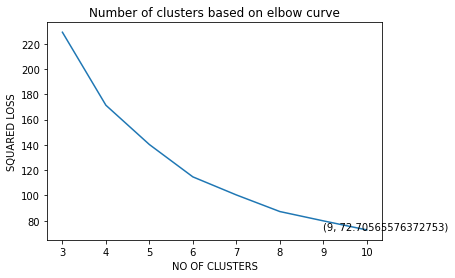

minimal number of clusters obtained is -  9
Loss for each minimal cluster is -  72.70565576372753


In [64]:
error= []
for i in num_clus:
    kmeans = KMeans(n_clusters = i).fit(vector_sentence)
    error.append(kmeans.inertia_)
    
minimal_cluster = np.argmin(error) + 2 
plt.plot(num_clus, error)
plt.title("Number of clusters based on elbow curve")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SQUARED LOSS")
xy = (minimal_cluster, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("minimal number of clusters obtained is - ", minimal_cluster)
print ("Loss for each minimal cluster is - ", min(error))

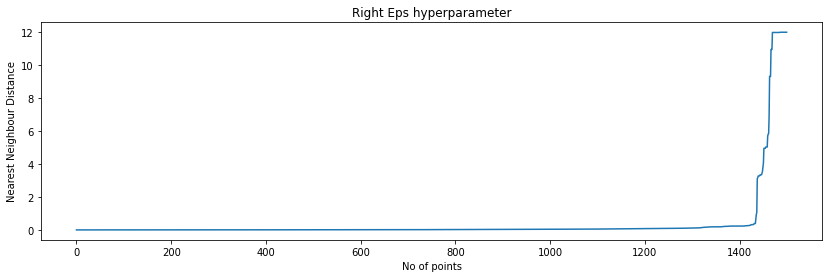

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


In [65]:
#DBSCAN CLUSTERING

from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def neighbour_nearest(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

neighbour = []
for i in vector_sentence[:1500]:
    neighbour.append( neighbour_nearest(i, vector_sentence[:1500]) )
neighbour.sort()

plt.figure(figsize=(14,4))
plt.title("Right Eps hyperparameter")
plt.plot([x for x in range(len(neighbour))], neighbour)
plt.xlabel("No of points")
plt.ylabel("Nearest Neighbour Distance")
plt.show()

model_1 = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_1.fit(vector_sentence)

dbscan_cluster = data_frame
dbscan_cluster['AVG-W2V Clus Label'] = model_1.labels_
dbscan_cluster.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

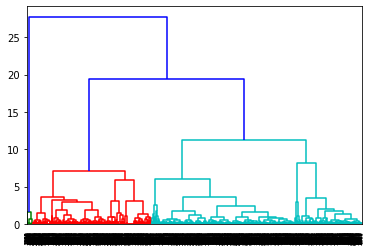

In [66]:
#Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
hirera_cluster=hierarchy.dendrogram(hierarchy.linkage(vector_sentence, method='ward'))
plt.axhline(y=35)

In [67]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(vector_sentence)

hier_cluster = dbscan_cluster
hier_cluster['AVG-W2V Clus Label'] = cluster.labels_

hier_cluster.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


It works good but it goes slow sometimes but its a very good phone I love it


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


I already had a phone with problems... I k

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

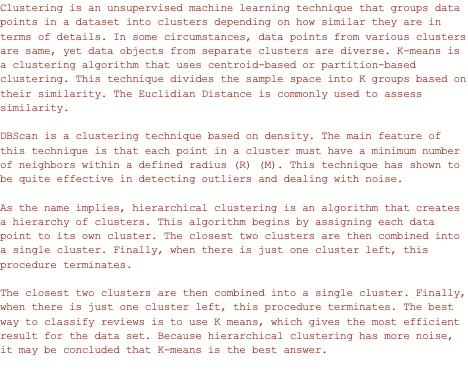